In [ ]:

import requests
import pandas as pd

url = "https://remoteok.com/api"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
if response.status_code != 200:
    print("Failed to fetch data:", response.status_code)
else:
    data = response.json()
    jobs = data[1:]

job_list = []
for job in jobs:
    job_list.append({
        "Job Title": job.get("position"),
        "Company": job.get("company"),
        "Location": job.get("location", "Remote"),
        "Tags/Skills": ", ".join(job.get("tags", [])),
        "Date Posted": job.get("date"),
        "Job Link": job.get("url"),
        "Salary": job.get("salary")
    })

df_jobs = pd.DataFrame(job_list)

print("Total jobs fetched:", len(df_jobs))
print(df_jobs.head())

df_jobs.to_csv("remote_ok_jobs.csv", index=False)
print("Jobs saved to 'remote_ok_jobs.csv'")


Total jobs fetched: 100
                               Job Title         Company        Location  \
0            Intern Software Development          Netomi  Remote - India   
1                           Web Designer  Wing Assistant        Columbia   
2  SAP S4 HANA EWM Functional Consultant      cBEYONData          Remote   
3                 Senior Product Manager           Maven          Remote   
4                   Finance Data Analyst       Circle.so          Remote   

                                         Tags/Skills  \
0  software, design, technical, code, web, java, ...   
1  web, virtual assistant, design, designer, supp...   
2   consultant, architect, support, management, lead   
3  manager, system, education, leader, management...   
4  analyst, growth, financial, finance, strategy,...   

                 Date Posted  \
0  2025-11-21T09:00:02+00:00   
1  2025-11-21T01:00:01+00:00   
2  2025-11-20T22:00:17+00:00   
3  2025-11-20T17:00:16+00:00   
4  2025-11-20T13:00:15

In [ ]:

import pandas as pd

df = pd.read_csv("remote_ok_jobs.csv")

print(df.head())

print(df.info())


                               Job Title         Company        Location  \
0            Intern Software Development          Netomi  Remote - India   
1                           Web Designer  Wing Assistant        Columbia   
2  SAP S4 HANA EWM Functional Consultant      cBEYONData          Remote   
3                 Senior Product Manager           Maven          Remote   
4                   Finance Data Analyst       Circle.so          Remote   

                                         Tags/Skills  \
0  software, design, technical, code, web, java, ...   
1  web, virtual assistant, design, designer, supp...   
2   consultant, architect, support, management, lead   
3  manager, system, education, leader, management...   
4  analyst, growth, financial, finance, strategy,...   

                 Date Posted  \
0  2025-11-21T09:00:02+00:00   
1  2025-11-21T01:00:01+00:00   
2  2025-11-20T22:00:17+00:00   
3  2025-11-20T17:00:16+00:00   
4  2025-11-20T13:00:15+00:00   

             

In [ ]:

df['Job Title'] = df['Job Title'].fillna("Unknown")
df['Company'] = df['Company'].fillna("Unknown")
df['Location'] = df['Location'].fillna("Remote")
df['Tags/Skills'] = df['Tags/Skills'].fillna("Not Specified")
df['Salary'] = df['Salary'].fillna("Not Provided")

df['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Job Title    100 non-null    object             
 1   Company      100 non-null    object             
 2   Location     100 non-null    object             
 3   Tags/Skills  100 non-null    object             
 4   Date Posted  100 non-null    datetime64[ns, UTC]
 5   Job Link     100 non-null    object             
 6   Salary       100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 5.6+ KB
None


In [ ]:

df['Job Title'] = df['Job Title'].str.lower()
df['Company'] = df['Company'].str.lower()
df['Tags/Skills'] = df['Tags/Skills'].str.lower()


df['Job Title'] = df['Job Title'].str.strip()
df['Company'] = df['Company'].str.strip()
df['Tags/Skills'] = df['Tags/Skills'].str.strip()


In [ ]:

from collections import Counter

all_skills = []
for tag_list in df['Tags/Skills']:
    skills = [s.strip() for s in tag_list.split(",") if s]
    all_skills.extend(skills)

top_skills = Counter(all_skills).most_common(20)
print("Top 20 skills in the dataset:")
for skill, count in top_skills:
    print(skill, count)


Top 20 skills in the dataset:
engineer 33
digital nomad 30
software 29
design 28
senior 24
technical 23
support 23
engineering 21
lead 18
backend 17
management 16
system 16
growth 14
financial 14
code 13
marketing 13
testing 12
leader 12
operational 12
web 11


In [ ]:

for skill, _ in top_skills[:10]:
    df[f"skill_{skill}"] = df['Tags/Skills'].apply(lambda x: 1 if skill in x else 0)

df['is_remote'] = df['Location'].apply(lambda x: 1 if 'remote' in x.lower() else 0)

print(df.head())


                               Job Title         Company        Location  \
0            intern software development          netomi  Remote - India   
1                           web designer  wing assistant        Columbia   
2  sap s4 hana ewm functional consultant      cbeyondata          Remote   
3                 senior product manager           maven          Remote   
4                   finance data analyst       circle.so          Remote   

                                         Tags/Skills  \
0  software, design, technical, code, web, java, ...   
1  web, virtual assistant, design, designer, supp...   
2   consultant, architect, support, management, lead   
3  manager, system, education, leader, management...   
4  analyst, growth, financial, finance, strategy,...   

                Date Posted  \
0 2025-11-21 09:00:02+00:00   
1 2025-11-21 01:00:01+00:00   
2 2025-11-20 22:00:17+00:00   
3 2025-11-20 17:00:16+00:00   
4 2025-11-20 13:00:15+00:00   

                   

In [ ]:
df.to_csv("remote_ok_jobs_cleaned.csv", index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

df = pd.read_csv("remote_ok_jobs_cleaned.csv")

def parse_salary(salary):
    try:
        if pd.isnull(salary) or salary == "Not Provided":
            return np.nan
        salary = salary.replace("$","").replace("k","000").split("-")[0]
        return float(salary)
    except:
        return np.nan

df['Salary_numeric'] = df['Salary'].apply(parse_salary)

df_known = df[df['Salary_numeric'].notna()]
df_unknown = df[df['Salary_numeric'].isna()]

print("Known salaries:", len(df_known))
print("Missing salaries to predict:", len(df_unknown))


Known salaries: 0
Missing salaries to predict: 100


In [ ]:

import pandas as pd

df = pd.read_csv("remote_ok_jobs.csv")

df['Job Title'] = df['Job Title'].fillna("Unknown")
df['Company'] = df['Company'].fillna("Unknown")
df['Location'] = df['Location'].fillna("Remote")
df['Tags/Skills'] = df['Tags/Skills'].fillna("Not Specified")
df['Salary'] = df['Salary'].fillna("Not Provided")

df['is_remote'] = df['Location'].apply(lambda x: 1 if 'remote' in str(x).lower() else 0)

top_skills = ['python', 'javascript', 'aws', 'sql', 'react', 'django', 'node', 'html', 'css', 'java']
for skill in top_skills:
    df[f'skill_{skill}'] = df['Tags/Skills'].apply(lambda x: 1 if skill in str(x).lower() else 0)

salary_map = {
    "python": 90000,
    "javascript": 85000,
    "aws": 95000,
    "sql": 80000,
    "react": 90000,
    "django": 92000,
    "node": 88000,
    "html": 75000,
    "css": 75000,
    "java": 90000
}

def predict_salary(title, tags):
    title = str(title).lower()
    tags = str(tags).lower()
    for key, value in salary_map.items():
        if key in title or key in tags:
            return value
    return 80000

df['Salary_numeric'] = df.apply(lambda x: predict_salary(x['Job Title'], x['Tags/Skills']), axis=1)

print("Sample enriched data:")
print(df[['Job Title','Company','Tags/Skills','Salary_numeric','is_remote']].head())

df.to_csv("remote_ok_jobs_enriched.csv", index=False)
print("AI-augmented dataset saved as 'remote_ok_jobs_enriched.csv'")


Sample enriched data:
                               Job Title         Company  \
0            Intern Software Development          Netomi   
1                           Web Designer  Wing Assistant   
2  SAP S4 HANA EWM Functional Consultant      cBEYONData   
3                 Senior Product Manager           Maven   
4                   Finance Data Analyst       Circle.so   

                                         Tags/Skills  Salary_numeric  \
0  software, design, technical, code, web, java, ...           90000   
1  web, virtual assistant, design, designer, supp...           80000   
2   consultant, architect, support, management, lead           80000   
3  manager, system, education, leader, management...           80000   
4  analyst, growth, financial, finance, strategy,...           80000   

   is_remote  
0          1  
1          0  
2          1  
3          1  
4          1  
AI-augmented dataset saved as 'remote_ok_jobs_enriched.csv'


In [ ]:
import pandas as pd

df = pd.read_csv("remote_ok_jobs_enriched.csv")

print(df.head())
print(df.info())
print("Total jobs:", len(df))


                               Job Title         Company        Location  \
0            Intern Software Development          Netomi  Remote - India   
1                           Web Designer  Wing Assistant        Columbia   
2  SAP S4 HANA EWM Functional Consultant      cBEYONData          Remote   
3                 Senior Product Manager           Maven          Remote   
4                   Finance Data Analyst       Circle.so          Remote   

                                         Tags/Skills  \
0  software, design, technical, code, web, java, ...   
1  web, virtual assistant, design, designer, supp...   
2   consultant, architect, support, management, lead   
3  manager, system, education, leader, management...   
4  analyst, growth, financial, finance, strategy,...   

                 Date Posted  \
0  2025-11-21T09:00:02+00:00   
1  2025-11-21T01:00:01+00:00   
2  2025-11-20T22:00:17+00:00   
3  2025-11-20T17:00:16+00:00   
4  2025-11-20T13:00:15+00:00   

             

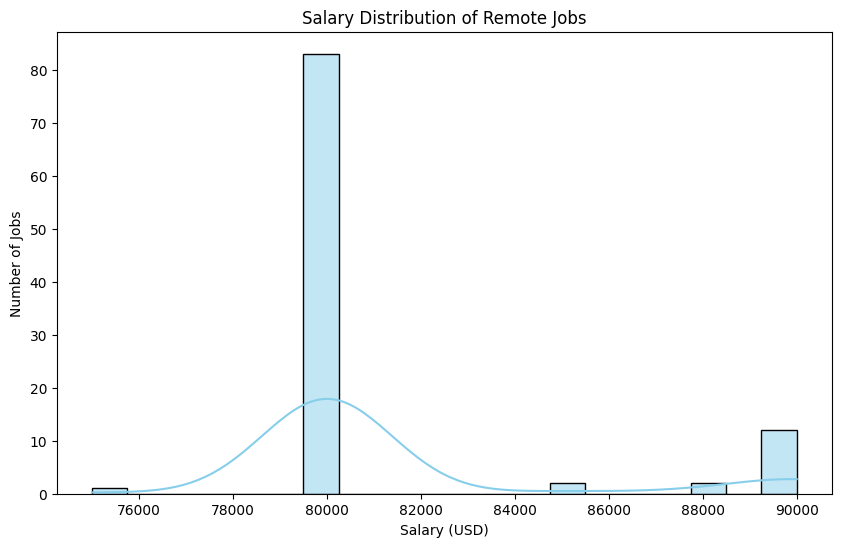

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Salary_numeric'], bins=20, kde=True, color='skyblue')
plt.title("Salary Distribution of Remote Jobs")
plt.xlabel("Salary (USD)")
plt.ylabel("Number of Jobs")
plt.show()


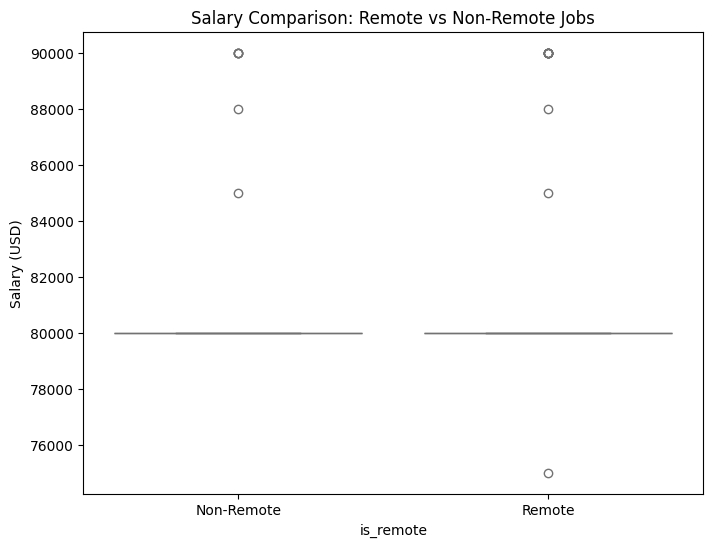

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.boxplot(x='is_remote', y='Salary_numeric', data=df, hue='is_remote',
            palette=['#AEC6CF', '#FFD1DC'])
plt.xticks([0,1], ['Non-Remote', 'Remote'])
plt.legend([],[], frameon=False)
plt.title("Salary Comparison: Remote vs Non-Remote Jobs")
plt.ylabel("Salary (USD)")
plt.show()


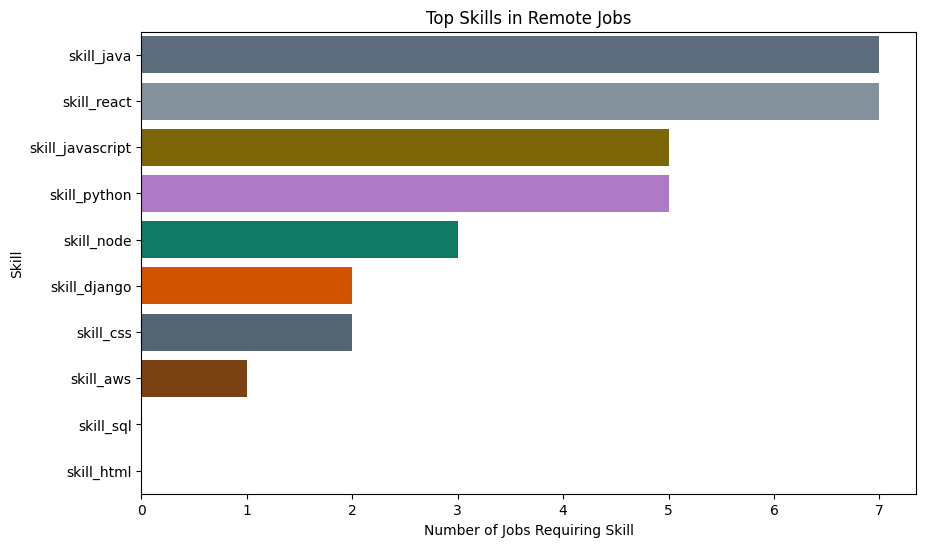

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

skill_cols = [col for col in df.columns if col.startswith('skill_')]
skill_counts = df[skill_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))

mature_colors = ['#5D6D7E', '#85929E', '#7D6608', '#AF7AC5', '#117A65', '#D35400', '#566573', '#784212']
colors = mature_colors * (len(skill_counts) // len(mature_colors) + 1)

sns.barplot(x=skill_counts.values, y=skill_counts.index, color=None)
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colors[i])

plt.title("Top Skills in Remote Jobs")
plt.xlabel("Number of Jobs Requiring Skill")
plt.ylabel("Skill")
plt.show()


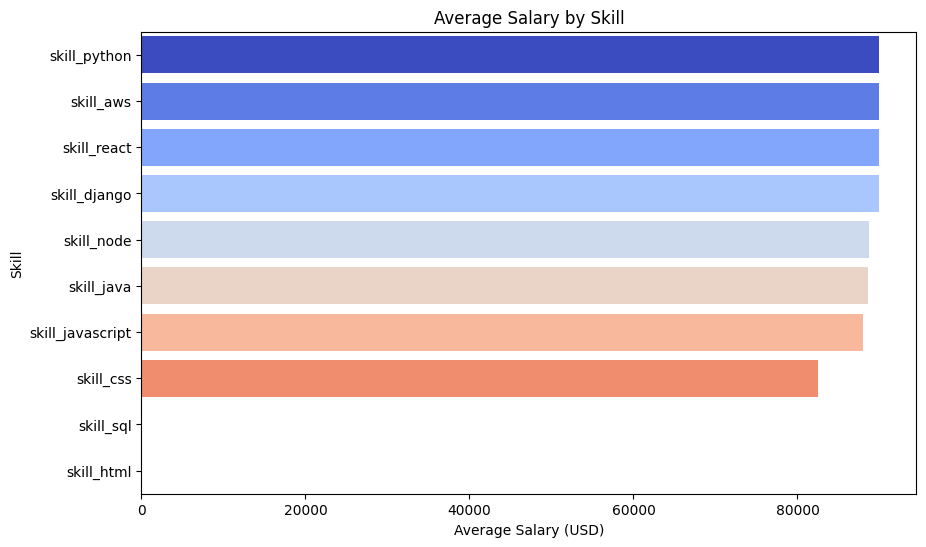

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import pandas as pd

avg_salary_by_skill = {skill: df[df[skill]==1]['Salary_numeric'].mean() for skill in skill_cols}
avg_salary_by_skill = pd.Series(avg_salary_by_skill).sort_values(ascending=False)

plt.figure(figsize=(10,6))


sns.barplot(x=avg_salary_by_skill.values, y=avg_salary_by_skill.index, color='lightgray')


colors = [cm.coolwarm(i) for i in np.linspace(0, 1, len(avg_salary_by_skill))]

for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)

plt.title("Average Salary by Skill")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Skill")
plt.show()


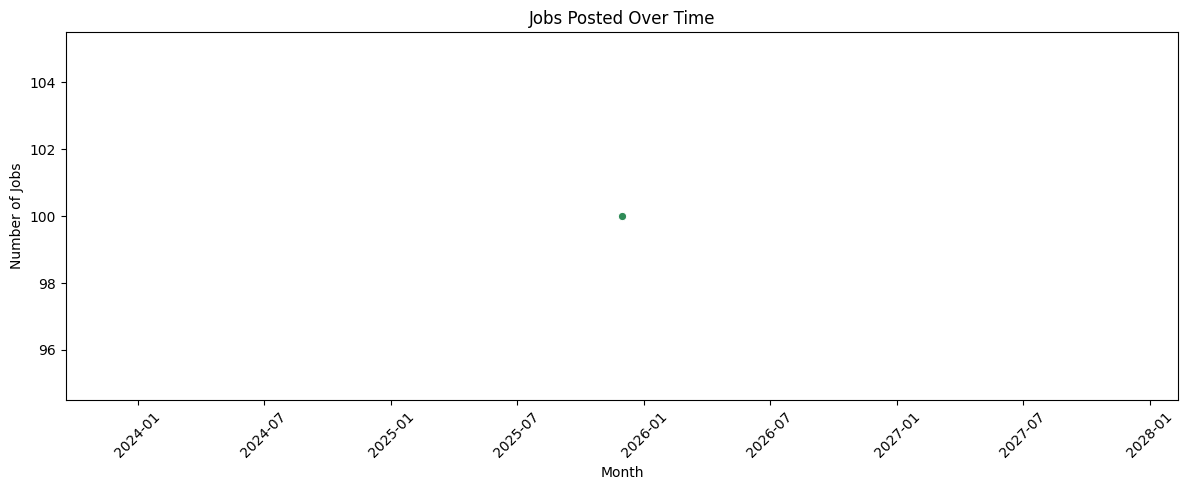

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce')
df = df.dropna(subset=['Date Posted'])

jobs_per_month = df.groupby(pd.Grouper(key='Date Posted', freq='ME')).size().reset_index(name='Count')

plt.figure(figsize=(12,5))
sns.lineplot(data=jobs_per_month, x='Date Posted', y='Count', marker='o', color='#2E8B57', linewidth=2)

plt.title("Jobs Posted Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

top_salary_skills = avg_salary_by_skill.head(5)
print("Top 5 highest paying skills:")
print(top_salary_skills)

def recommended_salary(row):
    skill_salaries = []
    for skill in skill_cols:
        if row[skill] == 1:
            skill_salaries.append(avg_salary_by_skill[skill])
    if skill_salaries:
        return sum(skill_salaries)/len(skill_salaries)
    else:
        return row['Salary_numeric']

df['Recommended_Salary'] = df.apply(recommended_salary, axis=1)

print(df[['Job Title','Tags/Skills','Salary_numeric','Recommended_Salary']].head())


Top 5 highest paying skills:
skill_python    90000.000000
skill_aws       90000.000000
skill_react     90000.000000
skill_django    90000.000000
skill_node      88666.666667
dtype: float64
                               Job Title  \
0            Intern Software Development   
1                           Web Designer   
2  SAP S4 HANA EWM Functional Consultant   
3                 Senior Product Manager   
4                   Finance Data Analyst   

                                         Tags/Skills  Salary_numeric  \
0  software, design, technical, code, web, java, ...           90000   
1  web, virtual assistant, design, designer, supp...           80000   
2   consultant, architect, support, management, lead           80000   
3  manager, system, education, leader, management...           80000   
4  analyst, growth, financial, finance, strategy,...           80000   

   Recommended_Salary  
0        88571.428571  
1        80000.000000  
2        80000.000000  
3        80000.00

In [ ]:

avg_remote = df[df['is_remote']==1]['Salary_numeric'].mean()
avg_non_remote = df[df['is_remote']==0]['Salary_numeric'].mean()

print(f"Average Remote Salary: ${round(avg_remote,2)}")
print(f"Average Non-Remote Salary: ${round(avg_non_remote,2)}")


Average Remote Salary: $81517.24
Average Non-Remote Salary: $81261.9


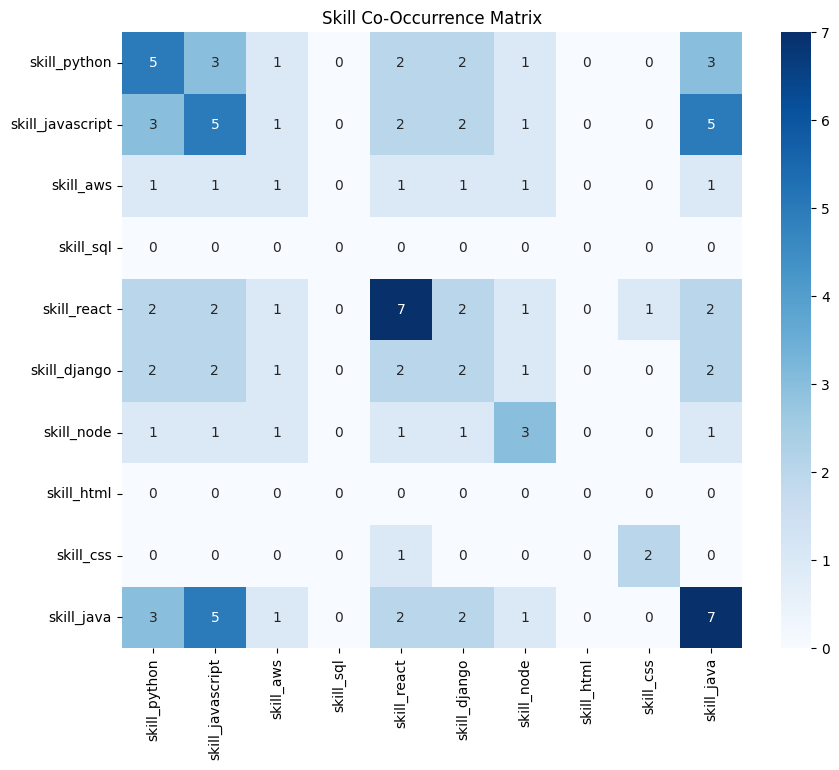

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

skill_matrix = df[skill_cols].T.dot(df[skill_cols])
plt.figure(figsize=(10,8))
sns.heatmap(skill_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Skill Co-Occurrence Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

X = df[['is_remote'] + skill_cols]
y = df['Recommended_Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE on recommended salaries:", round(mae,2))


MAE on recommended salaries: 224.16


In [ ]:

df.to_csv("remote_ok_jobs_ai_enriched.csv", index=False)
print("Final AI-augmented dataset saved as 'remote_ok_jobs_ai_enriched.csv'")


Final AI-augmented dataset saved as 'remote_ok_jobs_ai_enriched.csv'
